In [ ]:
####################################################### Loading libraries and script arguments #######################################################

import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import subprocess 
import argparse
import os

test=True
if test:
    print('Warning! Developer mode activated! ')
    input_graph_abc = '/home/jpereira/OEs/OE1.v2/Data/mcl_processing/blast_map.abc'
    input_fasta = '/home/jpereira/OEs/OE1.v2/Data/short_tandem_repeats/sequences_wo_str.fasta'
    param_inflation = float(1.4)
    output_names_tab =  '/home/jpereira/OEs/OE1.v2/Data/mcl_processing/blast_map.names.tab'
    output_matrix_mci = '/home/jpereira/OEs/OE1.v2/Data/mcl_processing/blast_map.mci'
    output_cluster_dump = '/home/jpereira/OEs/OE1.v2/Data/mcl_processing/dump.blast_map.mci'
    output_clust_fasta_dir = '/home/jpereira/OEs/OE1.v2/Data/mcl_processing/sequences_cluster'
    output_barplot_cluster_sizes = '/home/jpereira/OEs/OE1.v2/Visuals/mcl_processing/barplot.cluster_sizes.svg'
    
else:
    parser = argparse.ArgumentParser()
    parser.add_argument('--input-graph-abc', type=str, help='A table representing a graph in ABC format')
    parser.add_argument('--input-fasta', type=str, help='Sequences used to define the sequences clusters')
    parser.add_argument('--param-inflation', type=float)
    parser.add_argument('--output-blast-names-tab', type=str, help='Internal file created by mcxload. A file with the names of each sequence')
    parser.add_argument('--output-matrix-mci', type=str, help='Internal file created by mcl. A matrix in format mci with the distances between sequences')
    parser.add_argument('--output-cluster-dump', type=str, help='A file with the members of each cluster. Each cluster has its member in the same row.')
    parser.add_argument('--output-clust-fasta-dir', type=str, help='Directory with the clustericed sequences')
    parser.add_argument('--output-barplot-cluster-sizes', type=str)
    args = parser.parse_args()

    input_graph_abc              = args.input_graph_abc
    input_fasta                  = args.input_fasta
    param_inflation              = args.param_inflation
    output_names_tab             = args.output_blast_names_tab
    output_matrix_mci            = args.output_matrix_mci
    output_cluster_dump          = args.output_cluster_dump
    output_clust_fasta_dir       = args.output_clust_fasta_dir
    output_barplot_cluster_sizes = args.output_barplot_cluster_sizes

os.makedirs(os.path.dirname(output_names_tab), exist_ok=True)
os.makedirs(os.path.dirname(output_barplot_cluster_sizes), exist_ok=True)
os.makedirs(output_clust_fasta_dir, exist_ok=True)

##### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Warning! Developer mode activated! 


In [2]:
##################################################### Creating distance matrix from an ABC graph #####################################################

command = (f"mcxload" 
           f" -abc {input_graph_abc}"
           f" --stream-mirror"
           f" -re max" 
           f" -write-tab {output_names_tab}"
           f" -o {output_matrix_mci}"
           f" ")

try:
    subprocess.run(command, shell=True, check=True)
except subprocess.CalledProcessError as e:
    print('Error in running mcxload: ', e)
    print(f"Command {command}")

##### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

.................[mclIO] writing </home/jpereira/OEs/OE1.v2/Data/mcl_processing/blast_map.mci>
.......................................
[mclIO] wrote native interchange 906x906 matrix with 403065 entries to stream </home/jpereira/OEs/OE1.v2/Data/mcl_processing/blast_map.mci>
[mclIO] wrote 906 tab entries to stream </home/jpereira/OEs/OE1.v2/Data/mcl_processing/blast_map.names.tab>
[mcxload] tab has 906 entries


In [3]:
############################################################ Clustering graph using MCL ############################################################

# Compute the rounded inflation value and construct output paths
rounded_i = round(param_inflation * 10)
mcl_output_name = f"out.{os.path.basename(output_matrix_mci)}.I{rounded_i}"
mcl_output_path = os.path.join(os.path.dirname(output_matrix_mci), mcl_output_name)

command = (f"mcl"
           f" {output_matrix_mci}"
           f" -I {param_inflation}"
           f" -o {mcl_output_path}")

try:
    subprocess.run(command, shell=True, check=True)
except subprocess.CalledProcessError as e:
    print('Error in running mcl: ', e)

# Construct the mcxdump command, ensuring proper spacing
command = (
    f"mcxdump "
    f"-icl {mcl_output_path} "
    f"-tabr {output_names_tab} "
    f"-o {output_cluster_dump}"
)

try:
    subprocess.run(command, shell=True, check=True)
    print(f"mcxdump completed successfully. Output: {output_cluster_dump}")
except subprocess.CalledProcessError as e:
    print('Error in running mcxdump:', e)

##### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

[mclIO] reading </home/jpereira/OEs/OE1.v2/Data/mcl_processing/blast_map.mci>
.......................................
[mclIO] read native interchange 906x906 matrix with 403065 entries
[mcl] pid 694540
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ...................  27.79  0.12 1.32/0.25/5.05 1.20 1.14 1.14  99
  2  ...................  46.01  0.13 0.92/0.13/3.56 1.02 1.00 1.14  99
  3  ...................  53.33  0.13 0.81/0.06/1.47 1.01 1.00 1.13  99
  4  ...................  39.98  0.13 0.71/0.03/1.00 1.00 0.99 1.12  99
  5  ...................  46.99  0.13 0.57/0.05/1.00 1.01 0.98 1.11  99
  6  ...................  51.36  0.13 0.42/0.05/1.00 1.00 0.98 1.09  99
  7  ...................  45.63  0.13 0.30/0.18/1.00 1.00 0.98 1.07  98
  8  ...................  20.99  0.12 0.22/0.09/1.00 1.00 0.92 0.99  98
  9  ...................  23.34  0.11 0.20/0.10/1.00 1.00 0.82 0.81  98
 10  ...................  27.27  0.07 0.24/0.15/1.00 1.00 0.64 0.52  98
 11  .

mcxdump completed successfully. Output: /home/jpereira/OEs/OE1.v2/Data/mcl_processing/dump.blast_map.mci


[mcl] 4 clusters found
[mcl] output is in /home/jpereira/OEs/OE1.v2/Data/mcl_processing/out.blast_map.mci.I14

Please cite:
    Stijn van Dongen, Graph Clustering Via a Discrete Uncoupling Process,
    SIAM Journal on Matrix Analysis and Applications, 30(1):121-141, 2008.
    ( http://link.aip.org/link/?SJMAEL/30/121/1 )
[mclIO] reading </home/jpereira/OEs/OE1.v2/Data/mcl_processing/out.blast_map.mci.I14>
....
[mclIO] read native interchange 906x4 matrix with 906 entries


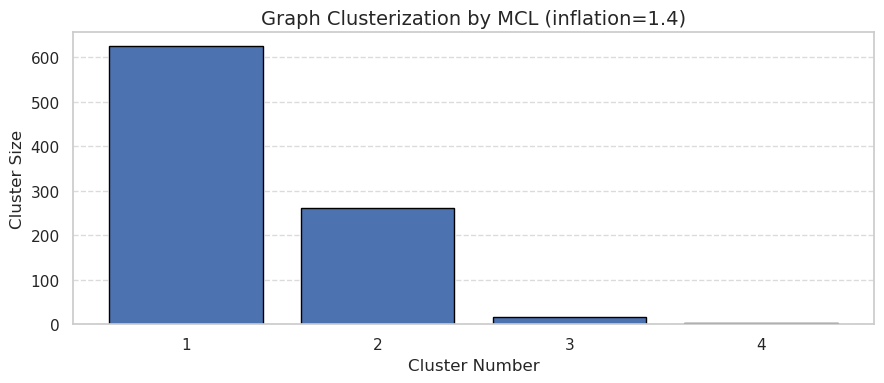

In [4]:
############################################################ Ploting cluster sizes ############################################################

sns.set_theme(style='whitegrid')

# Assuming that output_cluster_dump and param_inflation are defined
clust_sizes = []
clust_names = []

with open(output_cluster_dump, 'r') as file:
    for line in file:
        line = line.strip()  # Remove whitespace and newlines
        split_line = line.split('\t')
        clust_names.append(split_line)
        clust_sizes.append(len(split_line))

# Use a range of integers for x-axis: cluster numbers from 1 to n
x_array = np.arange(1, len(clust_sizes) + 1)
y_array = clust_sizes

plt.figure(figsize=(9, 4))
plt.bar(x_array, y_array, edgecolor='black')

plt.xlabel('Cluster Number', fontsize=12)
plt.ylabel('Cluster Size', fontsize=12)
plt.title(f'Graph Clusterization by MCL (inflation={param_inflation})', fontsize=14)

plt.xticks(ticks=x_array, labels=x_array)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', visible=False)    
plt.tight_layout()
plt.savefig(output_barplot_cluster_sizes)
if test:
    plt.show()
else:
    plt.close()

##### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [10]:
############################################################ Saving sequences of each cluster ############################################################
import os
from Bio import SeqIO

# Load all sequences into a dictionary {record.id: record}
seq_dict = SeqIO.to_dict(SeqIO.parse(input_fasta, format='fasta'))

with open(output_cluster_dump, 'r') as file:
    clust_num = 0

    for line in file:
        line = line.strip()
        clust_ids = line.split('\t')  # IDs in this cluster

        clust_num += 1
        output_path = os.path.join(output_clust_fasta_dir, f'cluster_{clust_num}.fasta')

        # Filter the sequences that belong to this cluster
        cluster_seqs = [seq_dict[seq_id] for seq_id in clust_ids if seq_id in seq_dict]

        # Write them as a FASTA
        with open(output_path, 'w') as out_fasta:
            SeqIO.write(cluster_seqs, out_fasta, 'fasta')


##### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -